In [27]:
#load modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation


In [1]:
# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

The goal is to load all 8 csvs each as a `pandas.DataFrame` in a single dict named `data` where each key is the name of the csv file, and each value is the dataframe created from the csv
```python
data = { 
    'sellers': DataFrame1,
    'orders': DataFrame2,
    ...
    }
```

### 1. Create the variable `csv_path`, which stores the path to your csv folder as a string

In [2]:
# Check your current working directory using `os.getcwd()` below 
import os
os.getcwd()

'/home/antonio/code/antoniovmonge/olist/notebooks'

In [3]:
csv_path = os.path.join('..','raw_data','csv')
csv_path

'../raw_data/csv'

In [4]:
# Testing code below
import pandas as pd
pd.read_csv(os.path.join(csv_path, 'olist_sellers_dataset.csv')).head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 2. Create the list `file_names` containing all csv file names in the csv directory

In [5]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

['olist_sellers_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_payments_dataset.csv',
 'product_category_name_translation.csv',
 'olist_products_dataset.csv',
 'olist_geolocation_dataset.csv']

### 3.  Create the list of dict key `key_names` 
Starting from file_names and:
- Removing its suffix ".csv" when it exists
- Removing its suffix "_dataset.csv" when it exists
- Removing its prefix "olist_" when it exists

In [6]:
key_names = [key_name
    .replace('olist_','')
    .replace('_dataset','')
    .replace('.csv','')
    for key_name in file_names]
key_names

['sellers',
 'order_reviews',
 'order_items',
 'customers',
 'orders',
 'order_payments',
 'product_category_name_translation',
 'products',
 'geolocation']

### 4. Construct the dictionary `data`

```python
data = { 
    'sellers': DataFrame1,
    'orders': DataFrame2,
    'order_items': DataFrame3,
    ...
    }
```

In [7]:
data = {}
for k,f in zip(key_names, file_names):
    data[k] = pd.read_csv(os.path.join(csv_path, f))
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

### 5. Implement the method `get_data()` in `olist/data.py`

It should return the dictionary `data` upon calling it as per below

```python
from olist.data import Olist
Olist().get_data()
```

In [8]:
# from olist.data import Olist
# Olist().get_data()['sellers'].head()

# EXPLORATORY DATA ANALYSIS

In [9]:
from olist.data import Olist
data = Olist().get_data()

### 1 - Run an exploratory analysis with [pandas profiling](https://github.com/pandas-profiling/pandas-profiling)

In [10]:
import pandas_profiling
datasets_to_profile = ['orders', 'products', 'sellers', 'customers', 'order_reviews', 'order_items']

In [11]:
# Creating and saving one html report per dataset to profile
for d in datasets_to_profile:
    print('exporting: '+d)
    profile = data[d].profile_report(title='Report for '+d)
    profile.to_file(output_file="../reports/"+d+'.html');

exporting: orders


Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: products


Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: sellers


Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: customers


Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: order_reviews


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: order_items


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 2 - Create a matching table

In [12]:
columns_matching_table = [
    'order_id',
    'review_id',
    'customer_id',
    'product_id',
    'seller_id',
]

Select only the columns of interest in the various dataframes of interest, before proceeding to any merge

In [13]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]
items = data['order_items'][['order_id', 'product_id','seller_id']]

Inspect the cardinality of each DataFrame using pd.DataFrame.shape and pd.Series.nunique()

In [17]:
print('orders:', orders.shape, orders.customer_id.nunique(), 'unique customer_ids, and', orders.order_id.nunique(), 'unique order_ids')
print('reviews: ', reviews.shape, reviews.order_id.nunique(), 'unique order_ids and', reviews.review_id.nunique(), 'unique reviews' )
print('items: ', items.shape, items.order_id.nunique(), 'unique order_ids,', items.product_id.nunique(), 
      'unique product_ids, and', items.seller_id.nunique(), 'unique seller_ids')

orders: (99441, 2) 99441 unique customer_ids, and 99441 unique order_ids
reviews:  (100000, 2) 99441 unique order_ids and 99173 unique reviews
items:  (112650, 3) 98666 unique order_ids, 32951 unique product_ids, and 3095 unique seller_ids


#### MERGING DataFrames

In [18]:
matching_table = orders.merge(reviews, on='order_id', how='outer').merge(items, on='order_id', how='outer')
matching_table

,customer_id,order_id,review_id,product_id,seller_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,e73b67b67587f7644d5bd1a52deb1b01,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,359d03e676b3c069f62cadba8dd3f6e8,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,e50934924e227544ba8246aeb3770dd4,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8
...,...,...,...,...,...
114095,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,29bb71b2760d0f876dfa178a76bc4734,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554
114096,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,371579771219f6db2d830d50805977bb,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48
114097,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,8ab6855b9fe9b812cd03a480a25058a1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48
114098,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,8ab6855b9fe9b812cd03a480a25058a1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48


##### Inspecting the cardinality of the final DataFrame

In [24]:
print('shape:',matching_table.shape)
print('unique values:')
print(matching_table.nunique())

shape: (114100, 5)
unique values:
customer_id    99441
order_id       99441
review_id      99173
product_id     32951
seller_id       3095
dtype: int64


#### Copy logic to data.py

Test functions

In [33]:
from olist.data import Olist
data = Olist().get_matching_table()
data

,customer_id,order_id,review_id,product_id,seller_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,e73b67b67587f7644d5bd1a52deb1b01,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,359d03e676b3c069f62cadba8dd3f6e8,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,e50934924e227544ba8246aeb3770dd4,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8
...,...,...,...,...,...
114095,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,29bb71b2760d0f876dfa178a76bc4734,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554
114096,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,371579771219f6db2d830d50805977bb,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48
114097,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,8ab6855b9fe9b812cd03a480a25058a1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48
114098,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,8ab6855b9fe9b812cd03a480a25058a1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48


# Metric Design 

First glimpse into Olist's business health

In [34]:
from olist.data import Olist
data = Olist().get_data()

#### Valid reviews

<AxesSubplot:xlabel='review_score', ylabel='count'>

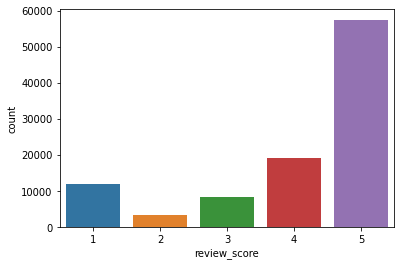

In [36]:
sns.countplot(x='review_score', data=data['order_reviews'])

In [41]:
print('Total:',len(data['order_reviews']['review_score']))
# data['order_reviews']['review_score'].count()

Total: 100000


#### Order Status

<AxesSubplot:xlabel='order_status', ylabel='count'>

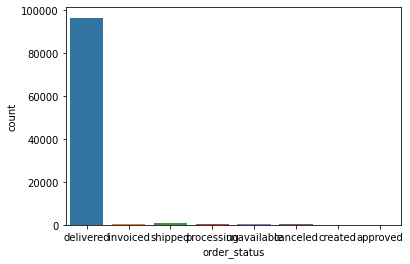

In [44]:
sns.countplot(x = 'order_status', data = data['orders'])

In [45]:
len(data['orders'])

99441

In [49]:
data['orders']['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

##### Checking if each order has a review

In [54]:
joint = data['orders'].merge(data['order_reviews'], on='order_id', how='outer')
joint['review_score'].isna().sum()

0

In [55]:
# Double check :) 
joint.groupby(['order_status'])['review_score'].apply(lambda s: s.isna().sum())

order_status
approved       0
canceled       0
created        0
delivered      0
invoiced       0
processing     0
shipped        0
unavailable    0
Name: review_score, dtype: int64

#####  ❗ The Olist dataset seems to have already been filtered to only contain orders with a review. 

#### 2 - Evolution of key business metrics over the past 14 months

Metrics 
- Which metric would you use as a key business output metric for Olist? 
- Which metric would you use to measure that a customer had a good experience with Olist? 
- Which metric would you use to measure shipping delay?
- For each metric, plot a trend line over time.

### Metric 1: Order numbers

weekly total orders

In [57]:
# Order numbers
orders = data['orders'].copy()

In [57]:
# Convert dates to python datetime objects
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders.set_index('order_purchase_timestamp')

In [58]:
orders.sort_index()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
2016-09-13 15:24:19,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00
2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
2016-10-02 22:07:52,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00
...,...,...,...,...,...,...,...
2018-09-29 09:13:03,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,NaN,NaN,NaN,2018-10-15 00:00:00
2018-10-01 15:30:09,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,NaN,NaN,NaN,2018-10-23 00:00:00
2018-10-03 18:55:29,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,NaN,NaN,NaN,2018-10-16 00:00:00


##### Monthly orders purchased

Text(0.5, 1.0, 'weekly orders (total)')

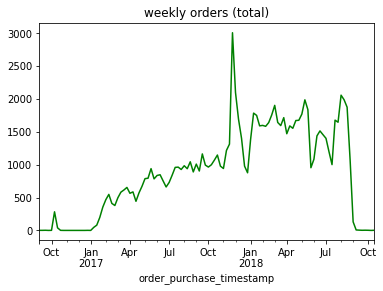

In [61]:
orders.resample('W')['order_id'].count().plot(color='g')
plt.title('weekly orders (total)')

Text(0.5, 1.0, 'weekly non-delivered orders')

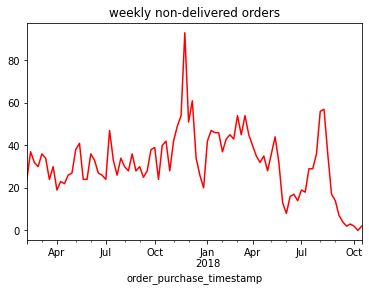

In [63]:
orders.query("order_status != 'delivered'").sort_index().loc['2017-02-01':].resample('W')['order_id'].count().plot(color='r')
plt.title('weekly non-delivered orders')